<a href="https://colab.research.google.com/github/Pobudi/Python-Portfolio/blob/master/Data_analysis-seaborn_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
data = pd.read_csv('data/cost_revenue_dirty.csv')

In [ ]:
print(data.shape)
print(data.isna().values.any())
print(data.duplicated().values.any())

(5391, 6)
False
False


In [ ]:
column_names = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in column_names:
    print(column)
    data[column] = data[column].astype(str).str.replace(",", "")
    data[column] = data[column].astype(str).str.replace("$", "")
    data[column] = pd.to_numeric(data[column])

data.head()

USD_Production_Budget
USD_Worldwide_Gross
USD_Domestic_Gross


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [ ]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [ ]:
avr_prod_budget = data.agg({"USD_Production_Budget": "mean"})
avr_gross_budget = data.agg({"USD_Worldwide_Gross": "mean"})
min_world_reven = data.USD_Worldwide_Gross.min()
min_dom_reven = data.USD_Domestic_Gross.min()
max_prod_budget = data.USD_Production_Budget.max()
max_gross_rev = data.USD_Worldwide_Gross.max()
print(f"avr_prod_budget: {avr_prod_budget}\navr_gross_budget: {avr_gross_budget}\nmin_world_reven: {min_world_reven}\nmin_dom_reven: {min_dom_reven}\nmax_prod_budget: {max_prod_budget}\nmax_gross_rev: {max_gross_rev}")

avr_prod_budget: USD_Production_Budget   31,113,737.58
dtype: float64
avr_gross_budget: USD_Worldwide_Gross   88,855,421.96
dtype: float64
min_world_reven: 0
min_dom_reven: 0
max_prod_budget: 425000000
max_gross_rev: 2783918982


In [ ]:
zero_gross = data[data.USD_Domestic_Gross == 0]
zero_gross.shape

(512, 6)

In [ ]:
world_zero_gross = data[data.USD_Worldwide_Gross == 0]
world_zero_gross.sort_values("USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5092,1435,2015-12-31,The Crow,40000000,0,0
3300,1631,2008-12-31,Black Water Transit,35000000,0,0
5045,1656,2015-10-30,Freaks of Nature,33000000,0,0


In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


In [ ]:
data.query('USD_Domestic_Gross == 0 & USD_Worldwide_Gross != 0')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
not_released = data[data.Release_Date > scrape_date]
clean_data = data.drop(not_released.index)

data.sort_values("Release_Date", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066


In [ ]:
loss = data.query('USD_Production_Budget > USD_Worldwide_Gross')
print(f"{round(len(loss)/len(clean_data)*100, 2)}% films lost money")

37.41% films lost money


# Seaborn for Data Viz: Bubble Charts

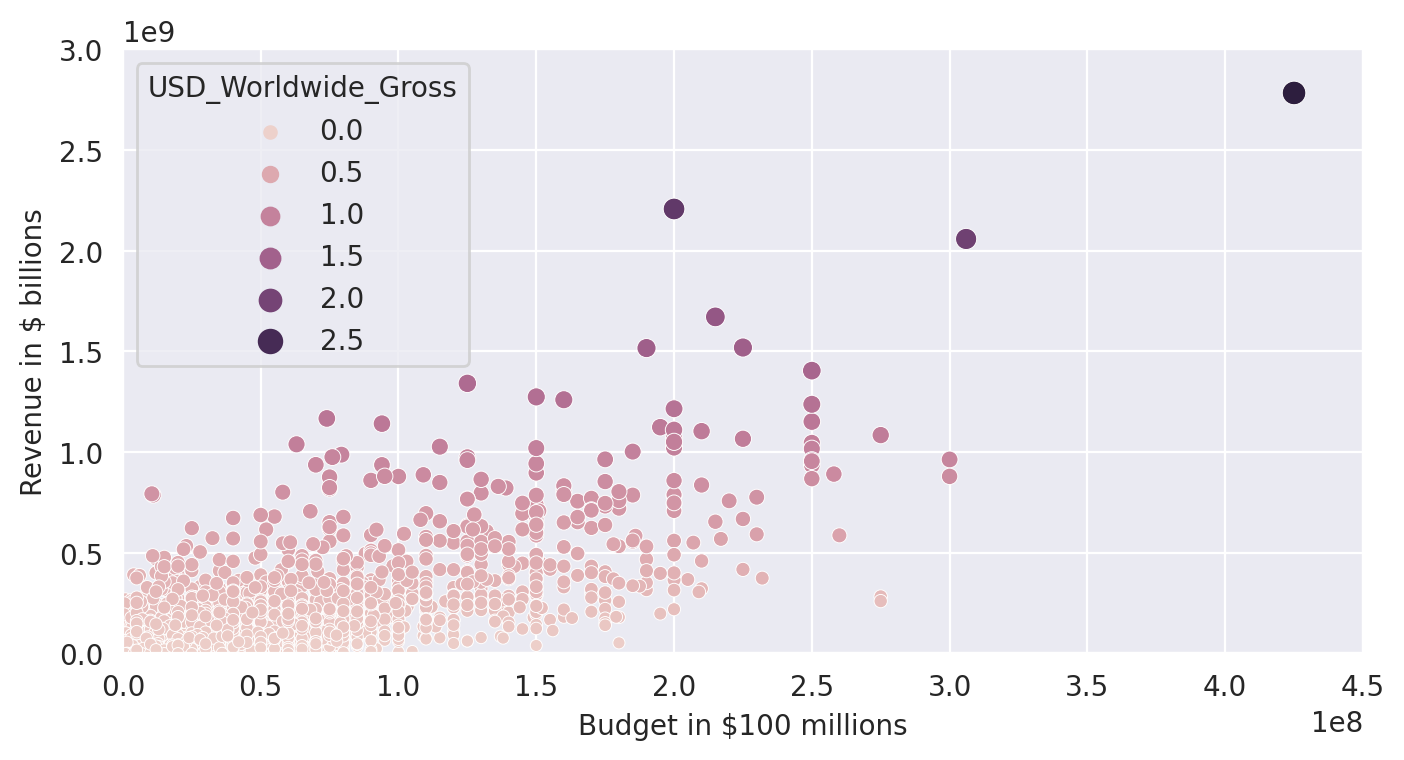

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=clean_data, 
                        x='USD_Production_Budget', 
                        y="USD_Worldwide_Gross",
                        hue="USD_Worldwide_Gross",
                        size="USD_Worldwide_Gross")
    ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



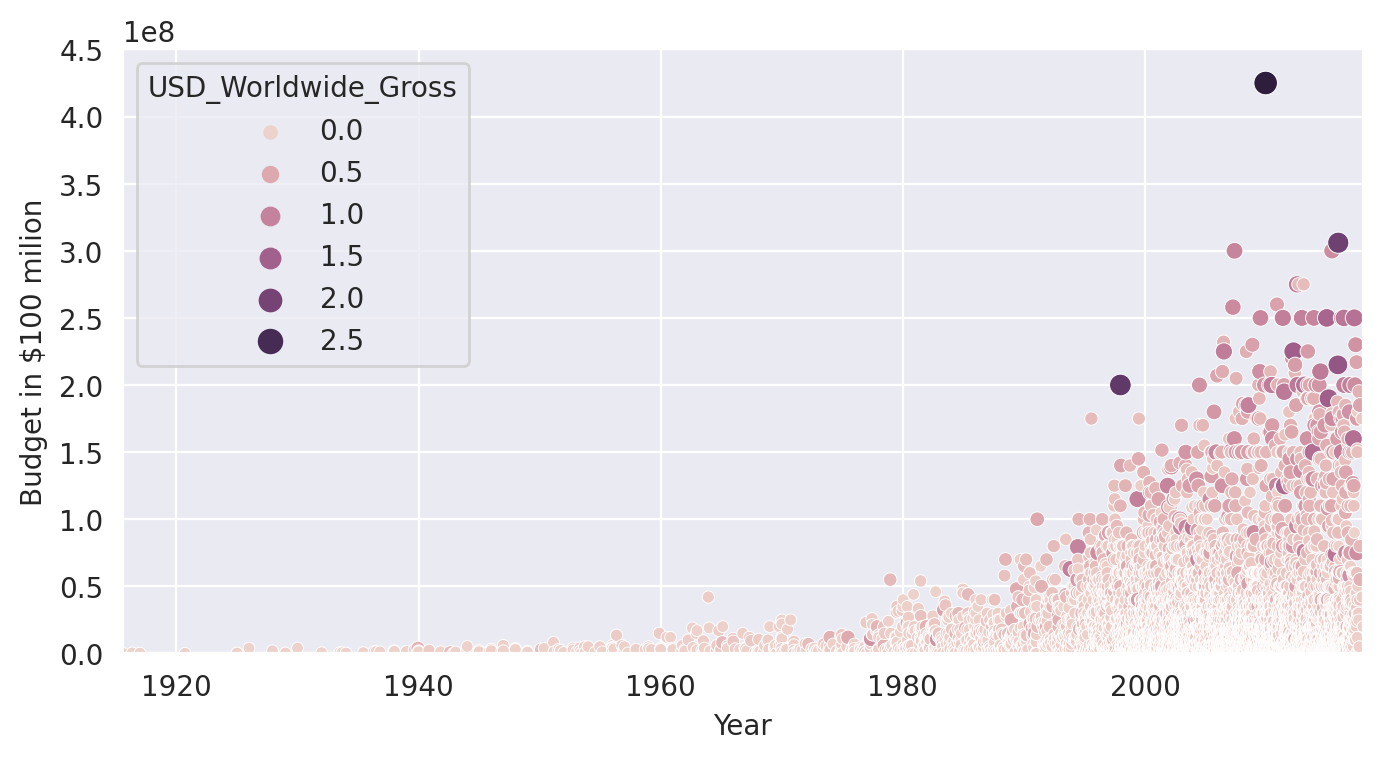

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=clean_data, 
                        x='Release_Date', 
                        y="USD_Production_Budget",
                        hue="USD_Worldwide_Gross",
                        size="USD_Worldwide_Gross")
    ax.set(ylim=(0, 450000000),
           xlim=(clean_data.Release_Date.min(), clean_data.Release_Date.max()),
           ylabel='Budget in $100 milion',
           xlabel='Year')
plt.show()

In [ ]:
decades = [row.Release_Date.year // 10 * 10 for _, row in clean_data.iterrows()]
clean_data["Decade"] = decades
counted_films = clean_data.groupby("Decade").count()

In [ ]:
old_films = clean_data.query('Decade < 1970')
new_films = clean_data.query('Decade > 1960')

# Seaborn Regression Plots

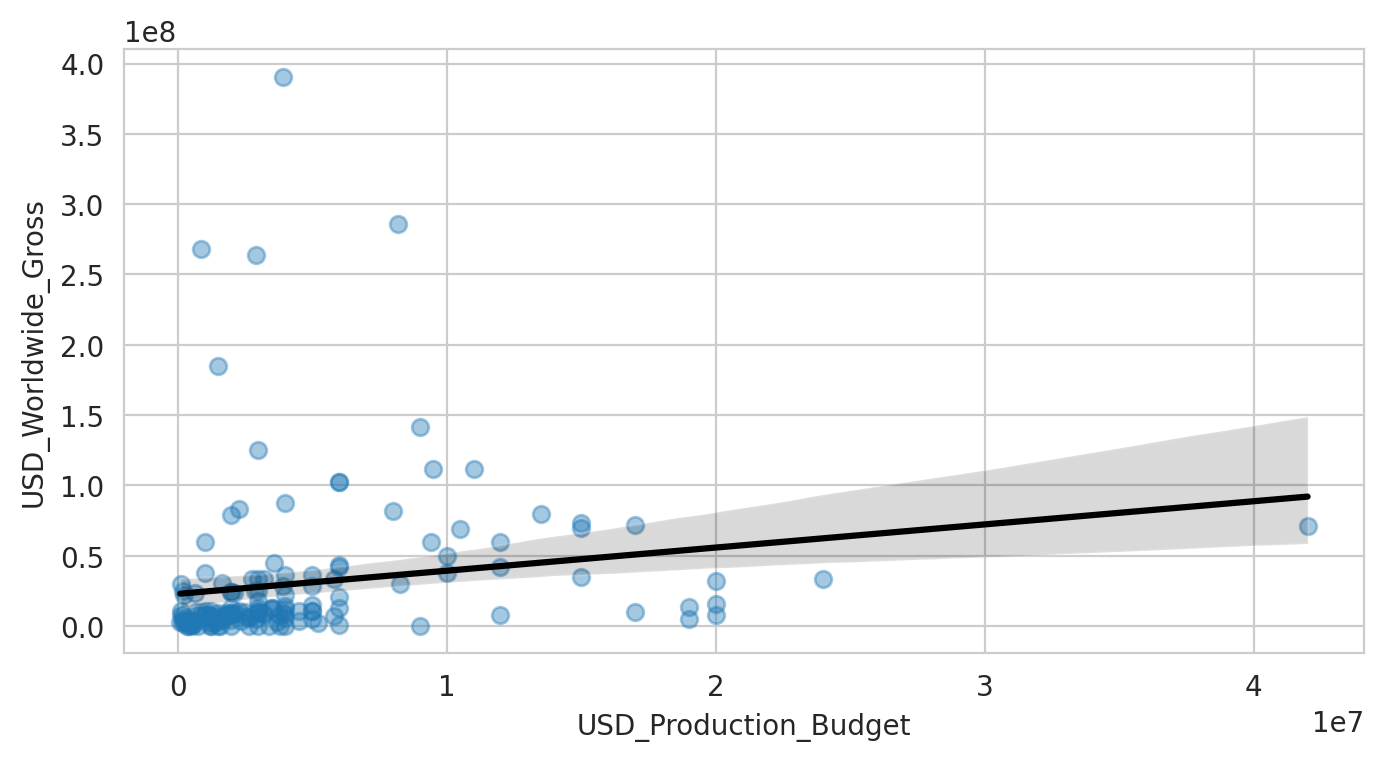

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

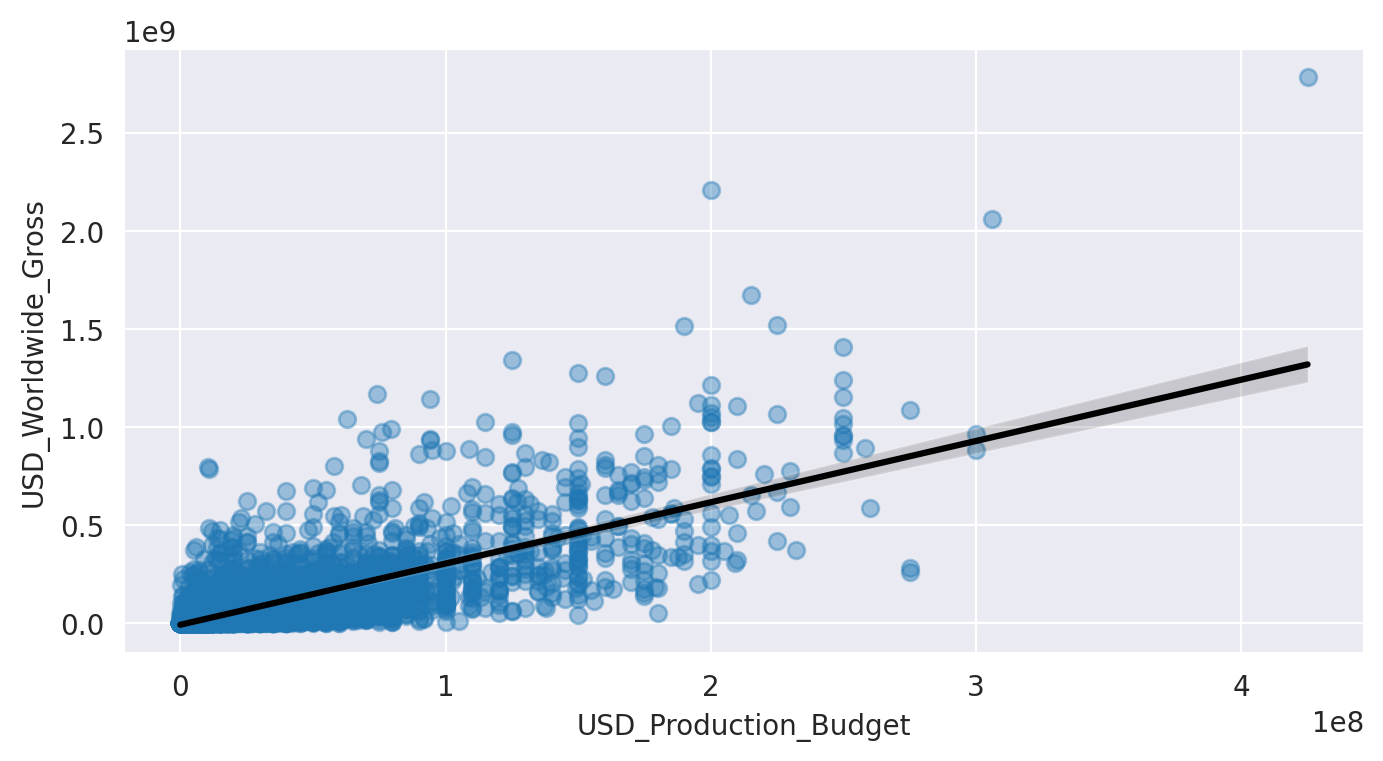

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

In [ ]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])
regression.fit(X, y)
# Theta zero (gdzie prosta przecina OY)
print(regression.intercept_)
# Theta one (wspolczynnik nachylenia prostej (chyba))
print(regression.coef_)
# r_squared (This means that our model explains about 56% of the variance in movie revenue)
# Po ludzku to chyba ile kropek trafia na prosta regresjii i niepewnosc
print(regression.score(X, y))

[-8650768.00661027]
[[3.12259592]]
0.5577032617720403


In [ ]:
X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

In [ ]:
regression.fit(X, y)
print(regression.intercept_)
print(regression.coef_)
print(regression.score(X, y))

[22821538.63508039]
[[1.64771314]]
0.02937258620576877
